# Travel Insurance
### Created by : Ilham Muhammaddin

## Business Problem Understanding

**Context**  

Sebuah perusahaan yang bergerak di bidang Travel Insurance ingin meningkatkan revenue terhadap agency travel yang telah bekerja sama dengan perusahaan Travel Insurance tersebut. Perusahaan ingin mengetahui pemegang polis yang seperti apa yang akan mengajukan klaim asuransi untuk pertanggungan. Sehingga perusahaan dapat meningkatkan akurasi strategi sales, marketing dan dapat memaksimalkan keuntungan. Informasi terkait demografi, tujuan dan durasi perjalanan dari pemegang polis

Target :

No : Tidak mengajukan klaim asuransi untuk pertanggungan

Yes : Mengajukan klaim asuransi untuk pertanggungan

**Problem Statement :**

Dalam project ini, sebuah perusahaan travel agency mengalami issue dalam meningkatkan revenue perusahaan. salah satu penyebabnya yaitu pendekatan strategi sales agent dan marketing mengeluarkan budget yg sama untuk semua tipe customer. Jika dilakukan strategi sales dan marketing yang sama secara terus menerus, maka biaya tersebut akan menjadi kerugian perusahaan karena pemegang polis yang mengajukan klaim asuransi merupakan sebuah resiko yang harus di antisipasi oleh perusahaan Travel Insurance. 

**Goals :**

Berdasarkan permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan seorang calon pemegang polis akan mengajukan klaim asuransi untuk pertanggungan atau tidak, sehingga dapat mengfokuskan kegiatan sales / marketing pada calon pemegang polis yang berpotensi tidak mengajukan klaim untuk pertanggungan.

Dan juga perusahaan ingin mengetahui variable apa saja yang dimiliki oleh pemegang polis yang mengajukan klaim pertanggungan atau tidak, sehingga perusahaan dapat merencanakan pendekatan strategi sales dan marketing yang lebih baik (calon pemegang polis yang tidak mengajukan klaim pertanggungan)

**Analytic Approach:**

Yang saya akan lakukan adalah menganalisis data untuk menemukan pola yang membedakan pemegang polis yang mengajukan klaim pertanggungan dan yang tidak mengajukan klaim pertanggungan.

Kemudian saya akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi kemungkinan seorang calon pemegang polis akan mengajukan klaim pertanggungan atau tidak.

**Metric Evaluation:**

Type 1 error : False Positive  
Konsekuensi: kurang efisiennya biaya sales dan marketing

Type 2 error : False Negative  
Konsekuensi: kehilangan calon pemegang polis potensial

Berdasarkan konsekuensinya, sebisa mungkin saya akan membuat model yang dapat meningkatkan efisiensi biaya sales marketing tetapi tidak membuat hilangnya calon pemegang polis yang potensial. Jadi saya ingin sebanyak mungkin prediksi kelas positif yang benar dengan sedikit mungkin prediksi kelas negatif. Jadi metrix utama yang saya gunakan adalah roc_auc


### Attribute Information

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| Agency | Object | Name of agency |
| Agency Type | Object | Type of travel insurance agencies |
| Distribution Channel | Object | Channel of travel insurance agencies |
| Product Name | Object | Name of the travel insurance products |
| Gender | Object | Gender of insured |
| Duration | Int | Duration of travel |
| Destination | Object | Destination of travel |
| Net Sales | Float | Amount of sales of travel insurance policies |
| Commission (in value) | Float | Commission received for travel insurance agency |
| Age | Int | Age of insured |
| Claim | Object | Claim status |

In [1490]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

# Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, fbeta_score

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [1491]:
#Load Dataset
df = pd.read_csv("data_travel_insurance.csv")
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [1492]:
# Menghitung dan tipe data tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


In [1493]:
display(df['Claim'].value_counts())

No     43651
Yes    677  
Name: Claim, dtype: int64

## Data Cleaning

Terdapat banyak data yang hilang/kosong dikolom gender (lebih dari 50%), sehingga saya akan menghapus kolom tersebut namun sebelum saya menghapus kolom tersebut, saya akan melihat terkait data duplikat. dikarenakan pada data set tidak memiliki id unik, maka saya akan mengasumsikan apabila pada satu baris tersebut memiliki data yang sama pada setiap variabel, maka baris tersebut merupakan data duplikat. 

In [1494]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Agency,object,0,0.00,16,"[ADM, JZI]"
1,Agency Type,object,0,0.00,2,"[Travel Agency, Airlines]"
2,Distribution Channel,object,0,0.00,2,"[Offline, Online]"
3,Product Name,object,0,0.00,26,"[Cancellation Plan, Annual Gold Plan]"
4,Gender,object,31647,71.39,2,"[nan, F]"
5,Duration,int64,0,0.00,437,"[264, 380]"
6,Destination,object,0,0.00,138,"[HUNGARY, VIET NAM]"
7,Net Sales,float64,0,0.00,1006,"[58.5, 2.45]"
8,Commision (in value),float64,0,0.00,915,"[6.9, 79.25]"
9,Age,int64,0,0.00,89,"[42, 1]"


<Axes: >

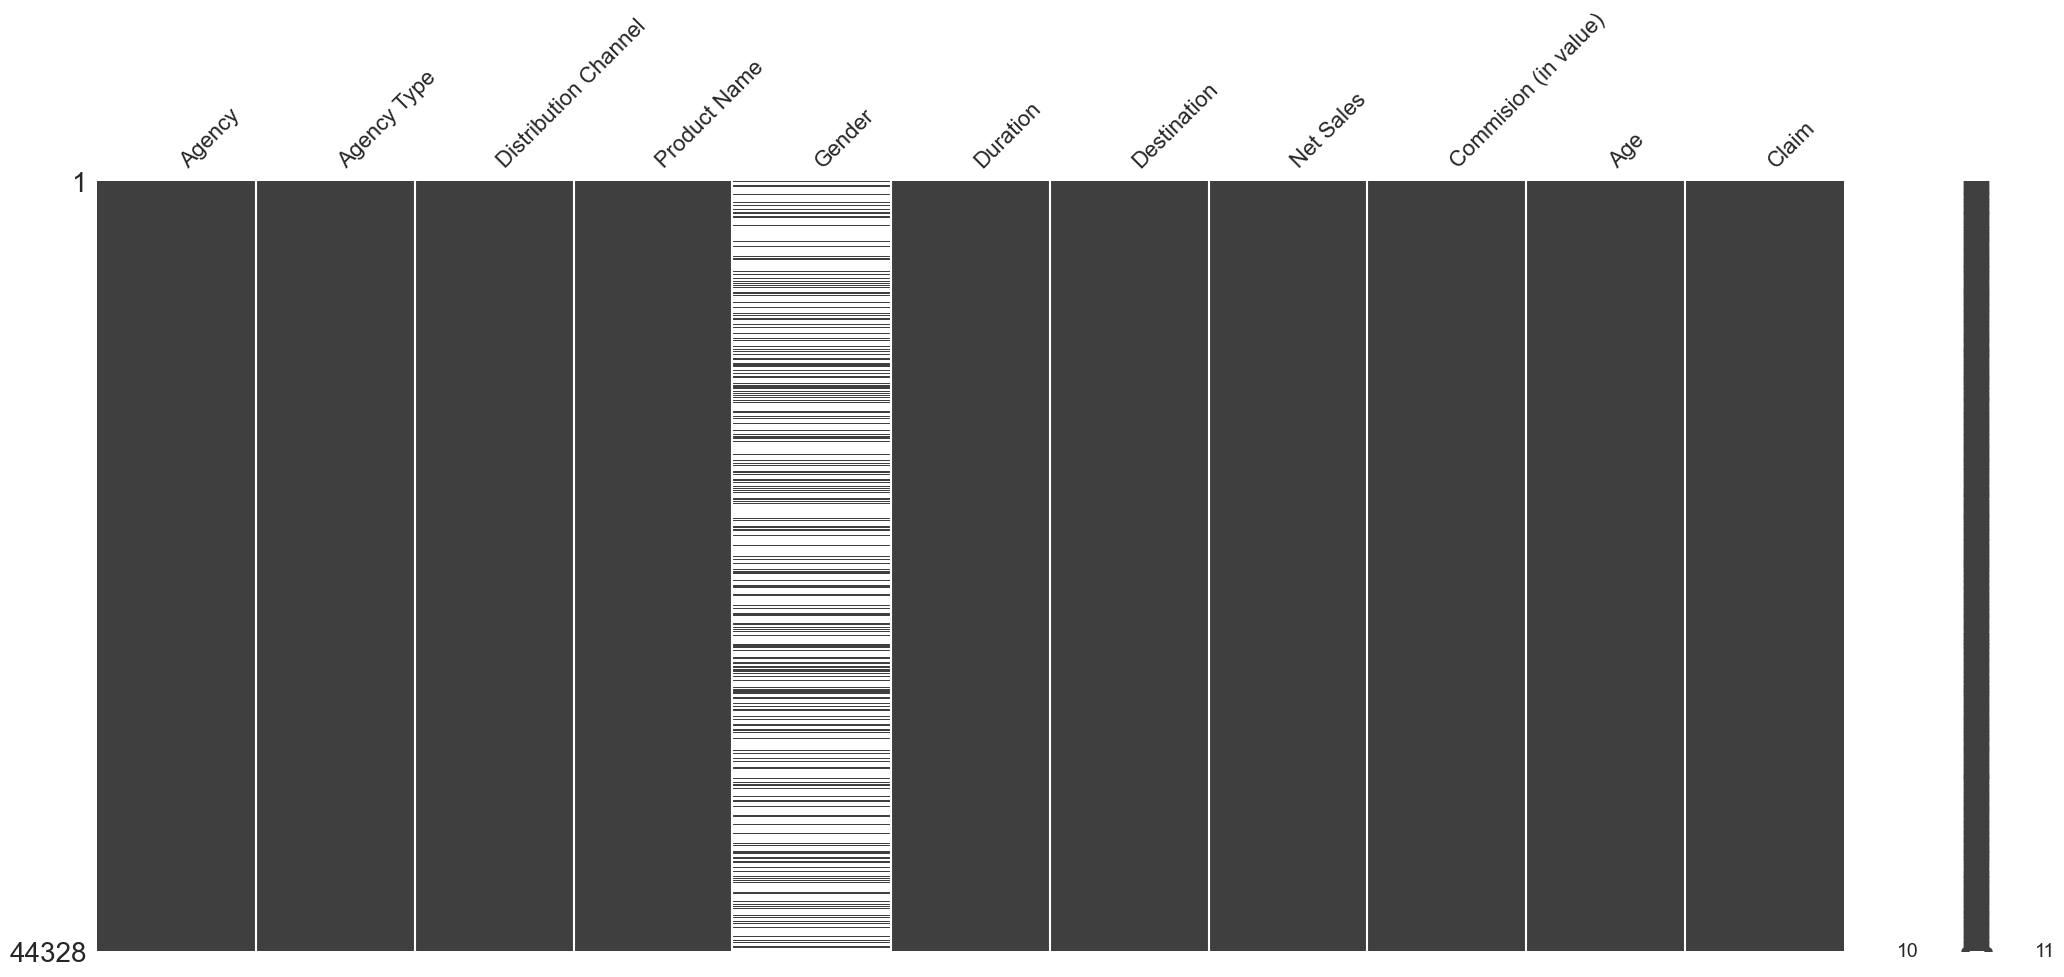

In [1495]:
missingno.matrix(df)

In [1496]:
#Menghapus data duplikat berdasarkan baris
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39661 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                39661 non-null  object 
 1   Agency Type           39661 non-null  object 
 2   Distribution Channel  39661 non-null  object 
 3   Product Name          39661 non-null  object 
 4   Gender                11994 non-null  object 
 5   Duration              39661 non-null  int64  
 6   Destination           39661 non-null  object 
 7   Net Sales             39661 non-null  float64
 8   Commision (in value)  39661 non-null  float64
 9   Age                   39661 non-null  int64  
 10  Claim                 39661 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.6+ MB


In [1497]:
display(df['Claim'].value_counts())

No     38986
Yes    675  
Name: Claim, dtype: int64

In [1498]:
#Menghapus kolom gender
df.drop(['Gender'],axis=1, inplace=True)
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Agency,object,0,0.0,16,"[SSI, CSR]"
1,Agency Type,object,0,0.0,2,"[Airlines, Travel Agency]"
2,Distribution Channel,object,0,0.0,2,"[Offline, Online]"
3,Product Name,object,0,0.0,26,"[Value Plan, Gold Plan]"
4,Duration,int64,0,0.0,437,"[73, 249]"
5,Destination,object,0,0.0,138,"[THAILAND, MOROCCO]"
6,Net Sales,float64,0,0.0,1006,"[36.5, -14.4]"
7,Commision (in value),float64,0,0.0,915,"[11.75, 10.33]"
8,Age,int64,0,0.0,89,"[14, 51]"
9,Claim,object,0,0.0,2,"[No, Yes]"


Kolom Gender sekarang sudah hilang, dan terlihat dari informasi di atas untuk missing value sudah tidak ada. Sekarang saya akan coba untuk melihat distribusi data setiap variabel yang berbentuk angka (int/float) untuk melihat apakah ada outlier atau tidak.


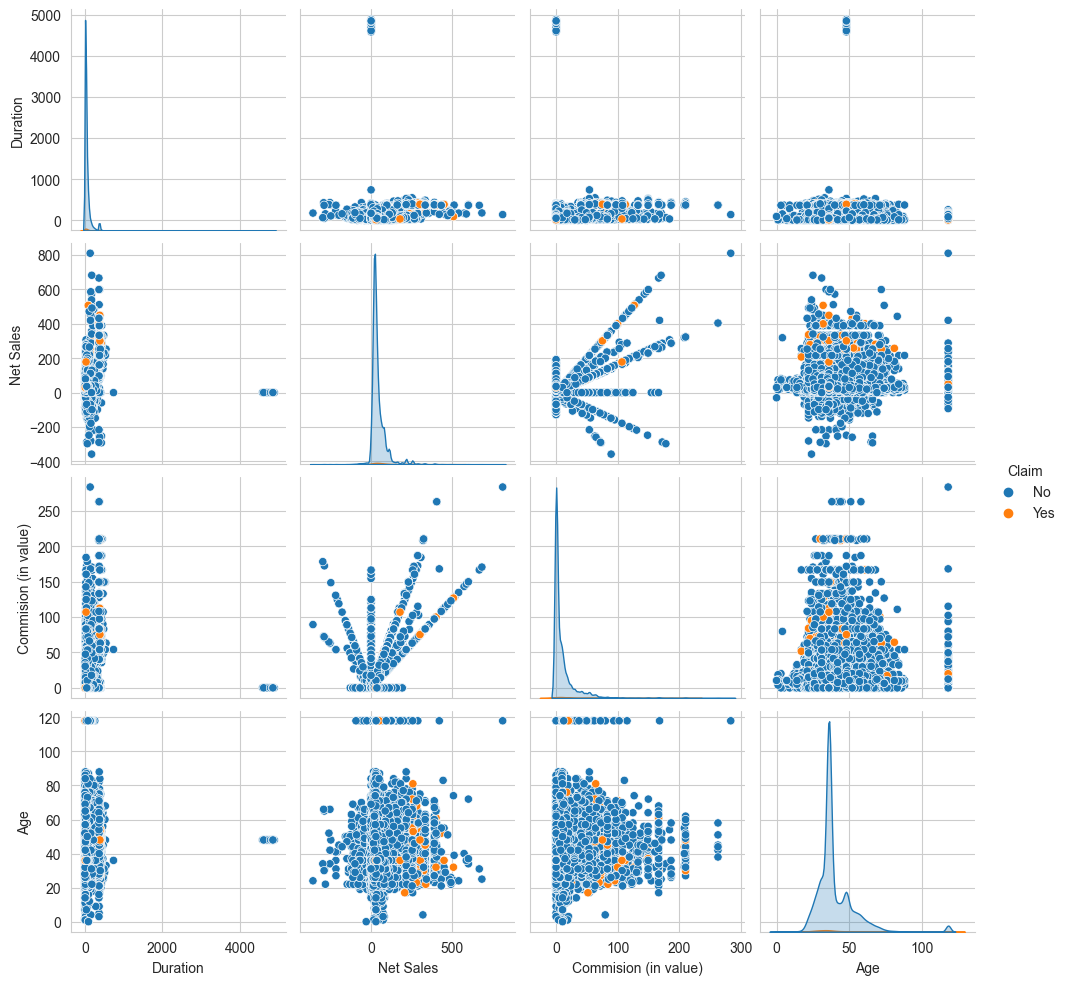

In [1499]:
#Visualisasi pengecekan distribusi data dan outlier

sns.set_style("whitegrid");
sns.pairplot(df, hue="Claim");
plt.show()

Dari visualisasi diatas saya dapat menarik suatu insight :

1. Pada 'Net sales' terdapat nilai minus, ini merupakan outlier dan harus dihapus.
2. Terlihat bahwa distribusi data 'net sales' dan 'commision' terlihat sama, jadi saya akan menghapus salah satu agar tidak mempengaruhi model.


In [1500]:
#Menghilangkan kolom 'commission'

df=df.drop(['Commision (in value)'], axis = 1)

In [1501]:
#Menghilangkan row yang net sales negative

df=df[df['Net Sales'] > 0]

df['Net Sales'].describe()

count    37934.00000
mean     45.03260   
std      48.82858   
min      0.07000    
25%      20.00000   
50%      29.70000   
75%      52.00000   
max      810.00000  
Name: Net Sales, dtype: float64

Setelah melihat deskripsi data net sales untuk memastikan tidak ada lagi nilai minus, sekarang saya akan melihat analisa deskripsi duration

In [1502]:
df['Duration'].describe()

count    37934.000000
mean     52.117151   
std      114.960229  
min     -1.000000    
25%      10.000000   
50%      24.000000   
75%      56.000000   
max      4881.000000 
Name: Duration, dtype: float64

Terlihat bahwa di durasi terdapat angka minus, dikarenakan satuan durasi tidak diketahui (apakah hari/jam), maka saya memilih untuk menghapus data durasi yang kurang dari atau sama dengan 0. Karena menurut logika suatu perjalanan pastinya memerlukan waktu.

In [1503]:
#Menghapus durasi yang dibawah atau sama dengan 0
df=df[df['Duration'] > 0]

df['Duration'].describe()

count    37896.000000
mean     52.169464   
std      115.005977  
min      1.000000    
25%      10.000000   
50%      24.000000   
75%      56.000000   
max      4881.000000 
Name: Duration, dtype: float64

In [1504]:
display(df['Duration'].value_counts())

6      1174
5      1133
7      1109
8      1097
10     1021
       ... 
293    1   
547    1   
409    1   
422    1   
290    1   
Name: Duration, Length: 431, dtype: int64

oke setelah mengatur data duration, saya akan melihat analisa deskripsi age

In [1505]:
df['Age'].describe()

count    37896.000000
mean     39.928198   
std      13.461145   
min      0.000000    
25%      35.000000   
50%      36.000000   
75%      45.000000   
max      118.000000  
Name: Age, dtype: float64

Pada data Age, biasa satuan data yang digunakan yaitu tahunan, artinya untuk angka min 0 itu dapat diasumsikan bayi yang belum 1 tahun sehingga bukan menjadi masalah. 

Terakhir saya akan merubah jenis data Claim menjadi Yes = 1 dan No = 0 dan juga merubah jenis data `Net Sales` menjadi tipe `Int`untuk mempermudah pembuatan model.

In [1506]:
df['Claim'].value_counts()
df.loc[df['Claim'] == 'Yes', 'Claim'] = 1
df.loc[df['Claim'] == 'No', 'Claim'] = 0
df['Claim'] = df['Claim'].astype(np.int64)
df['Claim'].value_counts()

0    37221
1    675  
Name: Claim, dtype: int64

In [1507]:
df['Net Sales'] = df['Net Sales'].astype(np.int64)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37896 entries, 0 to 44326
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Agency                37896 non-null  object
 1   Agency Type           37896 non-null  object
 2   Distribution Channel  37896 non-null  object
 3   Product Name          37896 non-null  object
 4   Duration              37896 non-null  int64 
 5   Destination           37896 non-null  object
 6   Net Sales             37896 non-null  int64 
 7   Age                   37896 non-null  int64 
 8   Claim                 37896 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 2.9+ MB


Disini terlihat data set tidak seimbang. Data sudah bersih, saya akan lanjutkan ke tahap data analysis

## Data Analysis

<Axes: xlabel='Claim', ylabel='Net Sales'>

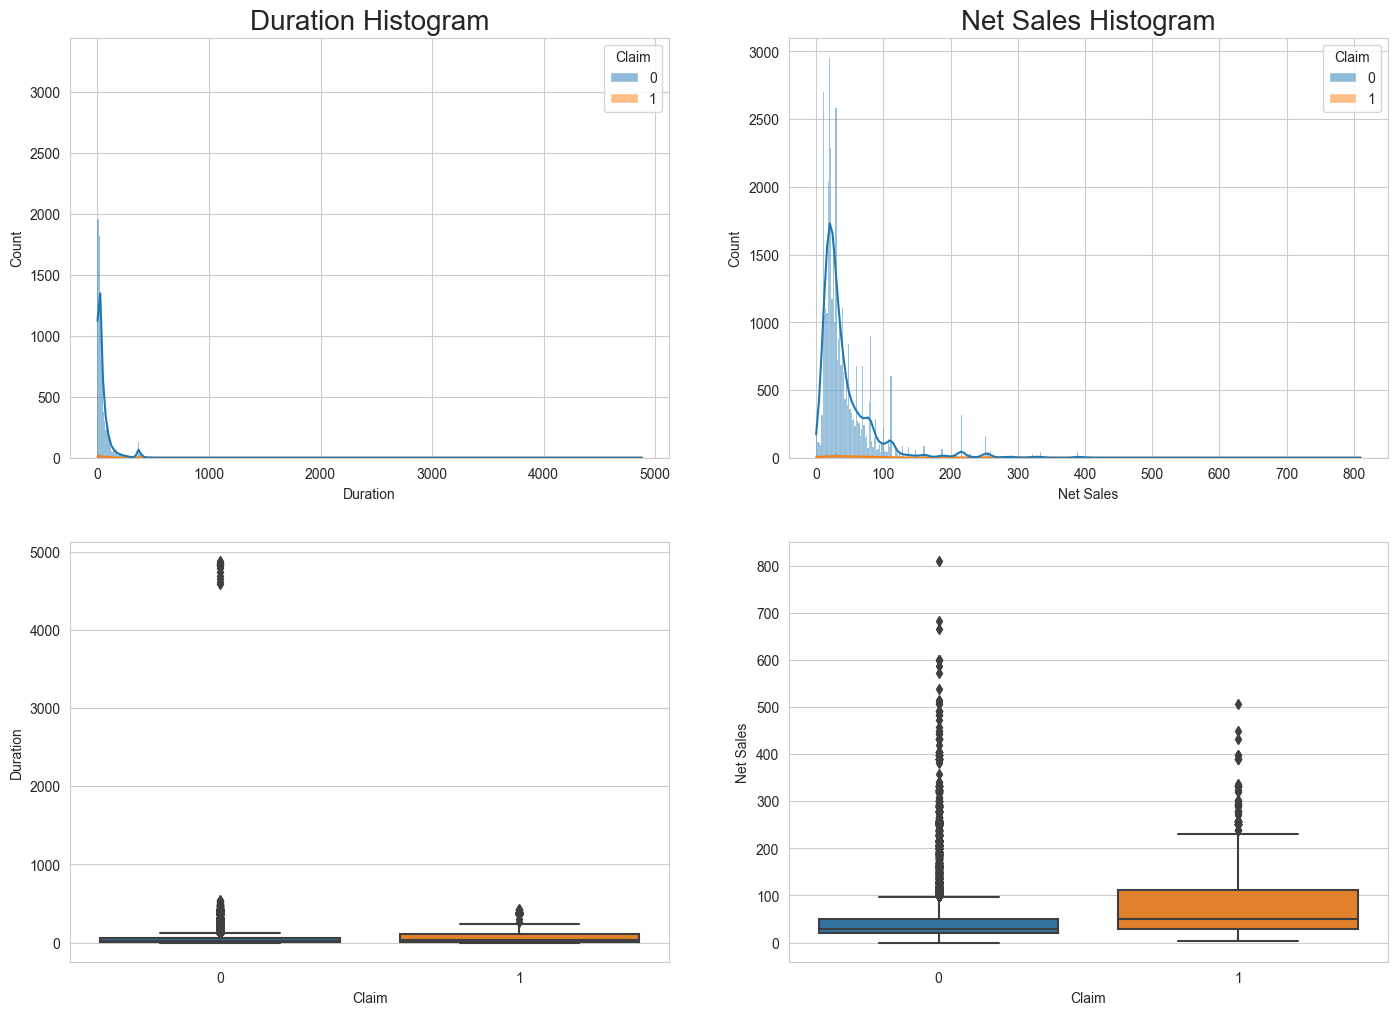

In [1508]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.histplot(data=df,x='Duration',hue='Claim',kde=True)
plt.title('Duration Histogram',fontsize=20)

plt.subplot(222)
sns.histplot(data=df,x='Net Sales',hue='Claim',kde=True)
plt.title('Net Sales Histogram',fontsize=20)

plt.subplot(223)
sns.boxplot(data=df,y='Duration', x='Claim')

plt.subplot(224)
sns.boxplot(data=df,y='Net Sales', x='Claim')


Berdasarkan histogram dan boxplot diatas, terlihat bahwa distribusi data variabel Duration dan Net Sales terdapat sedikit perbedaan, dimana untuk duration dari claim yang No dan Yes, dimana yang Claim = Yes secara keseluruhan berada pada durasi yang rendah dibanding yang Claim = No yang terdapat pada duration yang lebih merata. Bentuk curva histogram konsisten menurun. 

Sedangkan distribusi Net Sales, Claim = Yes cenderung berada di tengah dan Claim = No penyebaran data lebih merata. perbedaan lebih jelas terdapat pada bentuk curva histogramnya, yaitu meningkat terlebih dahulu kemudian menurun membentu seperti sebuah lonceng.

Sekarang saya akan membandingkan juga dengan variabel Age

<Axes: xlabel='Claim', ylabel='Age'>

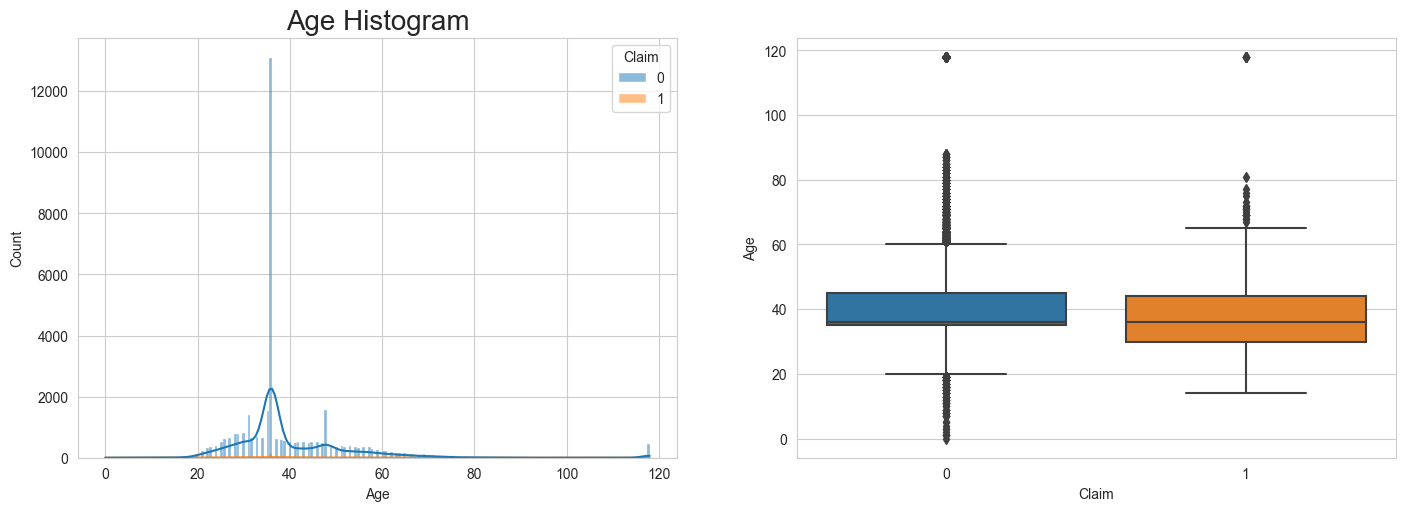

In [1509]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.histplot(data=df,x='Age',hue='Claim',kde=True)
plt.title('Age Histogram',fontsize=20)

plt.subplot(222)
sns.boxplot(data=df,y='Age', x='Claim')

Berdasarkan histogram dan boxplot variabel Age, untuk distribusi datanya juga berbeda dimana Claim = Yes cenderung berada di umur sekitar 20 - 60. Sedangkan Claim = No distribusi datanya merata dari semua umur.

Setelah melihat hasil histogram dan boxplot dari ketiga variabel data bentuk int/float tersebut, dapat disimpulkan sementara bahwa Net Sales, Duration, dan Age memungkinkan memiliki pengaruh terhadap Claim karena distribusi datanya tidak sama antara Claim = Yes dan Claim = No.

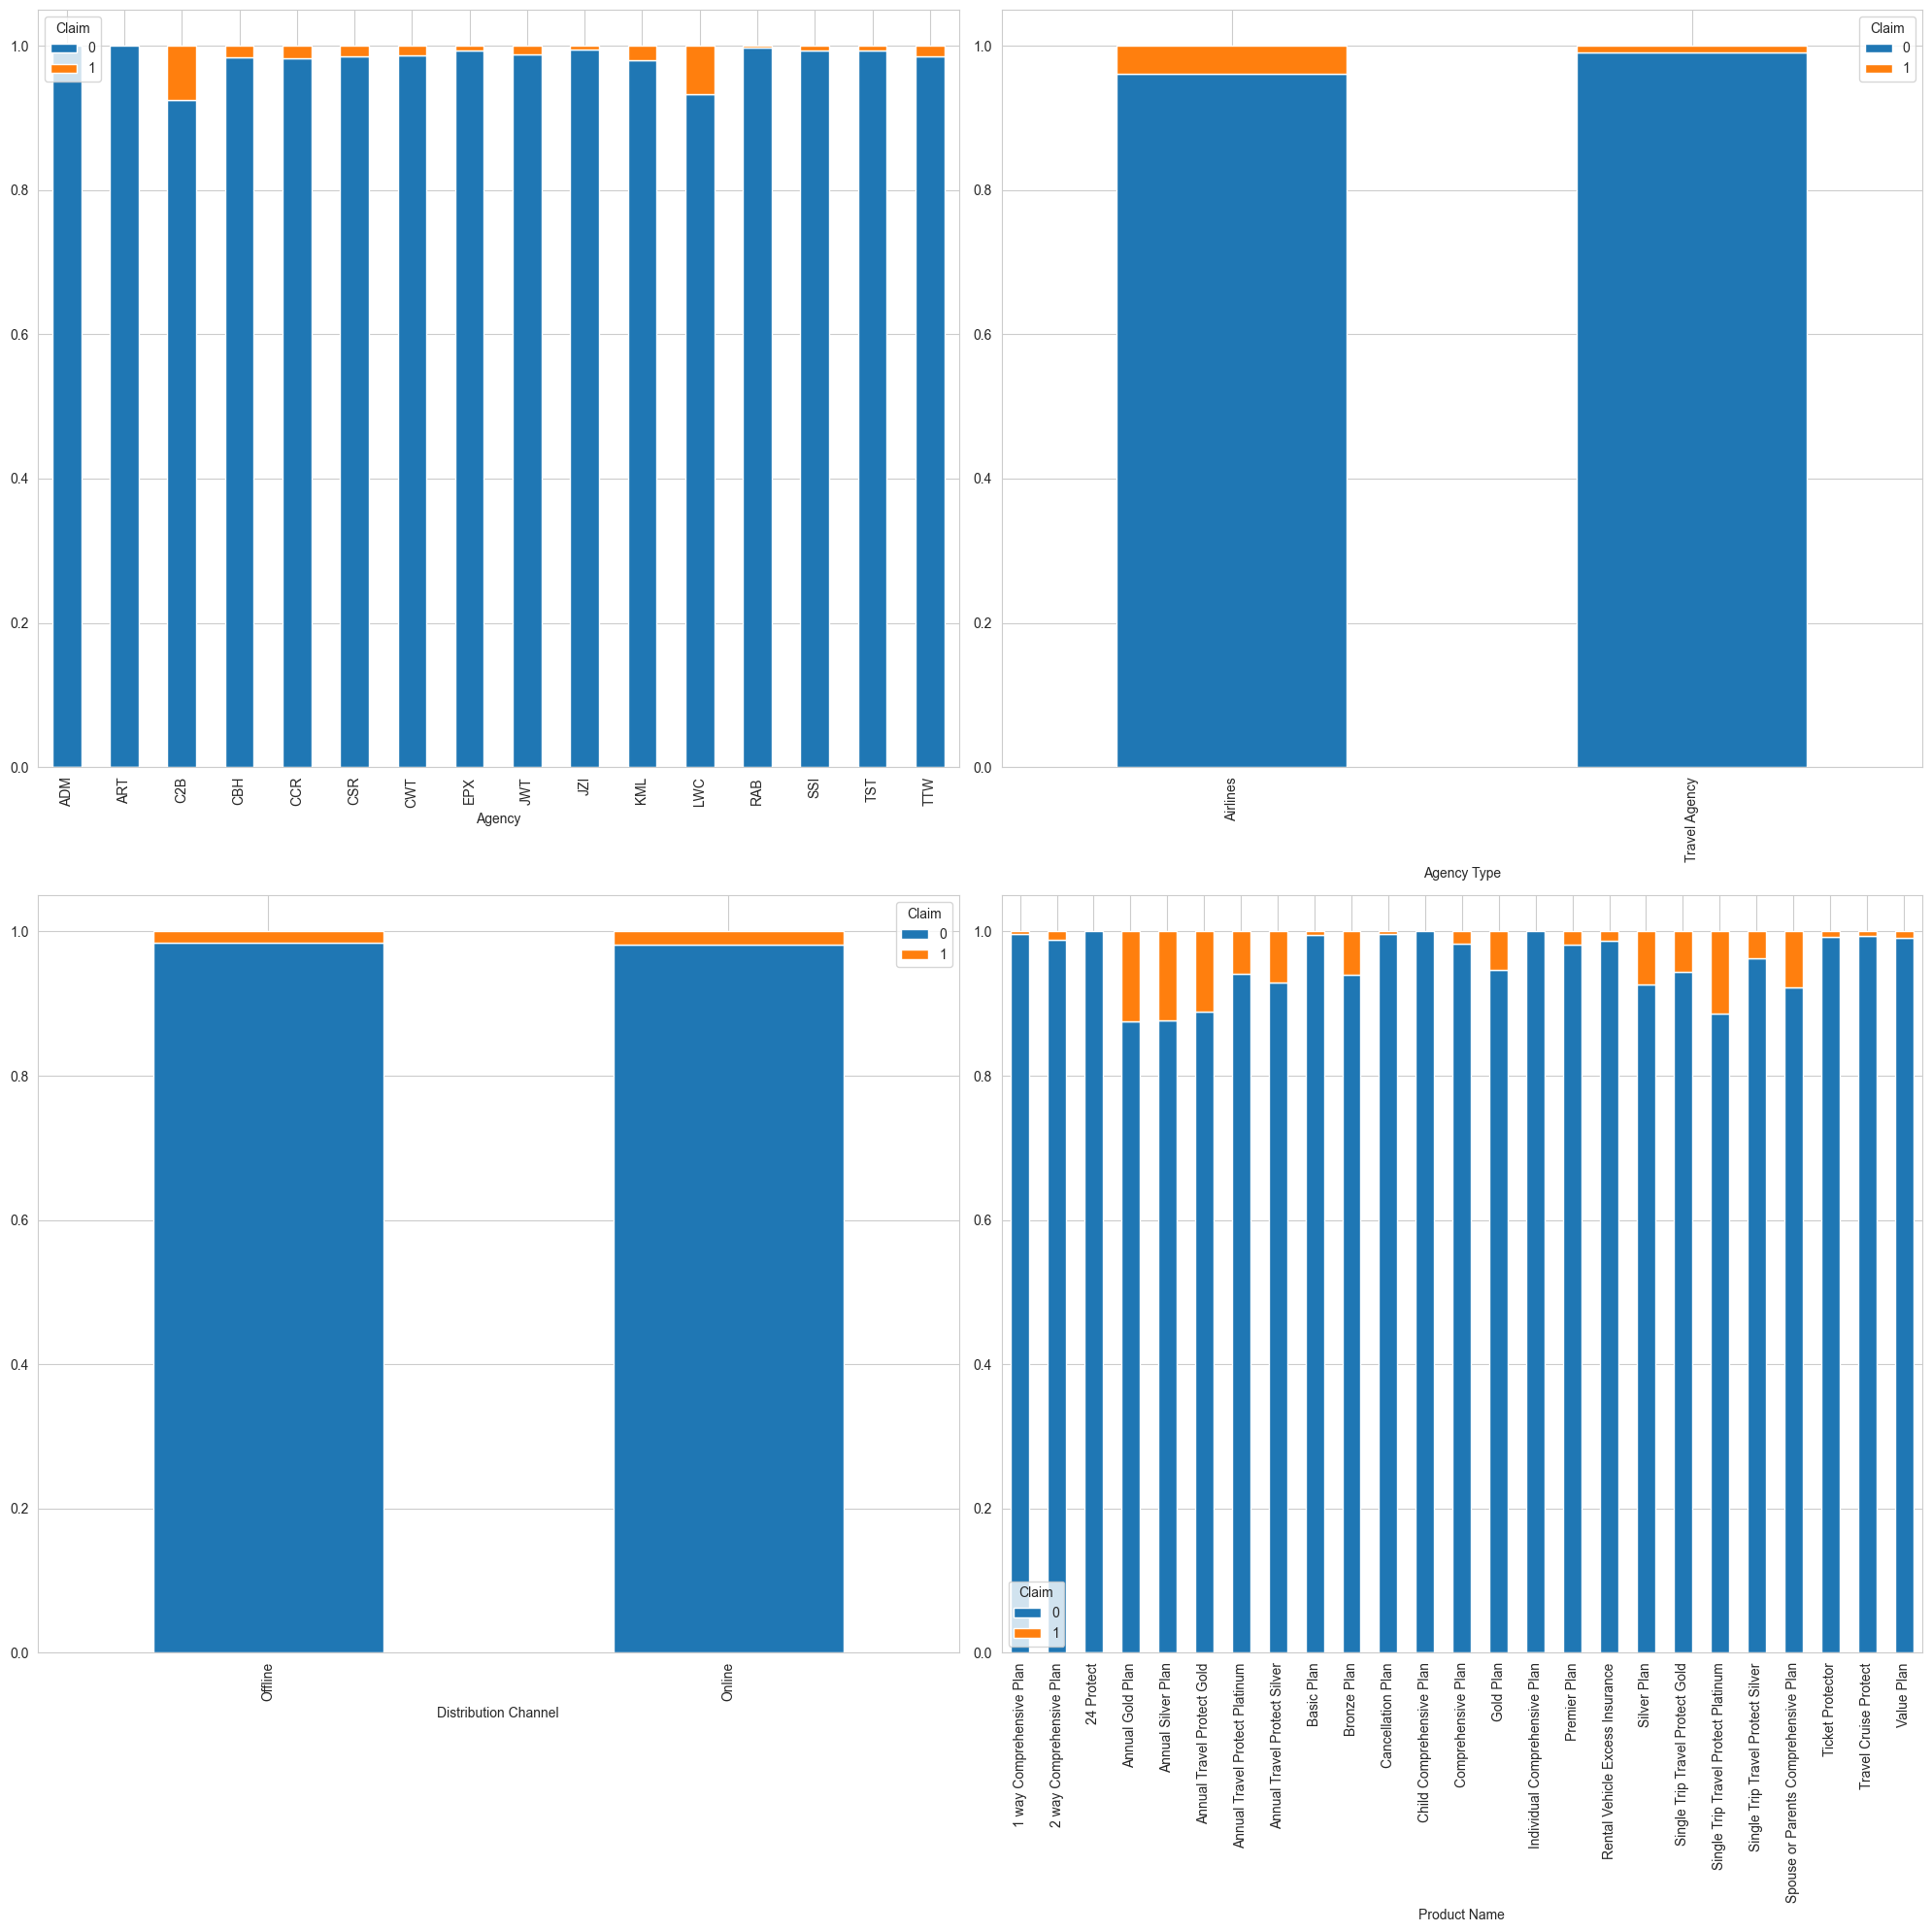

In [1510]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df.drop(columns=['Claim','Destination','Duration','Net Sales','Age']).columns:
    count +=1
    ax= plt.subplot(2,2,count)
    pd.crosstab(df[i],df['Claim'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

In [1511]:
for i in df.drop(columns=['Claim','Destination','Duration','Net Sales','Age']).columns:
    agency_df = df.groupby(i)['Claim'].value_counts(normalize=True).unstack()
    display(agency_df.sort_values(by=[1.0], ascending=False))

Claim,0,1
Agency,,
C2B,0.924553,0.075447
LWC,0.932870,0.067130
KML,0.979757,0.020243
CCR,0.982609,0.017391
CBH,0.984375,0.015625
TTW,0.984848,0.015152
CSR,0.985294,0.014706
CWT,0.986605,0.013395
JWT,0.987616,0.012384


Claim,0,1
Agency Type,,
Airlines,0.961131,0.038869
Travel Agency,0.991070,0.008930


Claim,0,1
Distribution Channel,,
Online,0.982144,0.017856
Offline,0.984507,0.015493


Claim,0,1
Product Name,,
Annual Gold Plan,0.875969,0.124031
Annual Silver Plan,0.876147,0.123853
Single Trip Travel Protect Platinum,0.886364,0.113636
Annual Travel Protect Gold,0.888889,0.111111
Spouse or Parents Comprehensive Plan,0.923077,0.076923
Silver Plan,0.927027,0.072973
Annual Travel Protect Silver,0.928571,0.071429
Bronze Plan,0.939519,0.060481
Annual Travel Protect Platinum,0.941176,0.058824


Berdasarkan Barplot dan table diatas saya dapat mengambil beberapa kesimpulan :
1. Pemegang polis dari `Agency` C2B dan LWC memiliki jumlah klaim pertanggungjawaban terbanyak dibanding pemegang polis dari `Agency` lainnya.
2. Pemegang polis dari `Agency type` dari `Airlines` lebih cenderung melakukan klaim pertanggungjawaban dibandingkan `Travel Agency`.
3. Pemegang polis yang terdaftar melalui `Distribution channel` secara `Online` sedikit cenderung lebih banyak melakukan klaim dibandingkan yang terdaftar secara `Offline`. Namun menurut saya untuk variabel ini lebih cenderung sama/ hanya beda sangat tipis.
4. Pemegang polis yang mendaftarkan ke `Product Name` nya `Annual Gold Plan` Cenderung lebih banyak melakukan klaim dibanding `Product Name` lainnya. 

Sekarang saya juga akan melihat kolom `Destination`. Apakah ada kecenderungan pemegang polis melakukan klaim dari tujuan perjalanan yang berbeda.

In [1512]:
agency_df = df.groupby('Destination')['Claim'].value_counts(normalize=True).unstack()
agency_df['count'] = df.groupby('Destination')['Claim'].count()
display(agency_df.sort_values(by=[1.0], ascending=False).head(15))
display(agency_df.sort_values(by=[1.0], ascending=False).tail(15))

Claim,0,1,count
Destination,,,
COSTA RICA,0.666667,0.333333,3
SINGAPORE,0.948479,0.051521,8055
CZECH REPUBLIC,0.951220,0.048780,41
ICELAND,0.953125,0.046875,64
ISRAEL,0.967742,0.032258,31
SOUTH AFRICA,0.977528,0.022472,89
ITALY,0.978339,0.021661,277
TURKEY,0.979167,0.020833,48
FRANCE,0.979933,0.020067,299


Claim,0,1,count
Destination,,,
SWEDEN,1.0,NaN,44
TAJIKISTAN,1.0,NaN,1
"TANZANIA, UNITED REPUBLIC OF",1.0,NaN,12
TIBET,1.0,NaN,1
TRINIDAD AND TOBAGO,1.0,NaN,2
TUNISIA,1.0,NaN,7
TURKMENISTAN,1.0,NaN,1
UGANDA,1.0,NaN,3
UKRAINE,1.0,NaN,9


Dari table diatas, terlihat `Destination` Costa Rica memiliki persentase terbesar pemegang polisnya melakukan klaim, namun dilihat dari total pemegang polisnya yang sangat sedikit, tidak bisa disimpulkan bahwa Costa Rica memiliki jumlah pemegang polis yang melakukan klaim terbesar. Jika dilihat sekilas, terdapat persamaan kecenderungan pemegang polis. yaitu pada setiap `Destination` memiliki Claim = No lebih besar dibandingkan Claim = Yes.

Sekarang saya akan ke tahap selanjutnya yaitu menyiapkan data untuk pembuatan model machine learning

## Data Preparation

In [1513]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10,33,0
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112,59,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16,28,0


In [1514]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Agency,object,0,0.0,16,"[RAB, EPX]"
1,Agency Type,object,0,0.0,2,"[Travel Agency, Airlines]"
2,Distribution Channel,object,0,0.0,2,"[Offline, Online]"
3,Product Name,object,0,0.0,25,"[Bronze Plan, Silver Plan]"
4,Duration,int64,0,0.0,431,"[75, 11]"
5,Destination,object,0,0.0,135,"[TAJIKISTAN, MAURITIUS]"
6,Net Sales,int64,0,0.0,282,"[399, 163]"
7,Age,int64,0,0.0,89,"[72, 46]"
8,Claim,int64,0,0.0,2,"[0, 1]"


Sekarang saya akan melakukan fitur encoding untuk kolom data kategorikal, yang saya lakukan adalah :

1. Merubah kolom `Agency` menggunakan One Hot Encoding, karena data pada kolom ini tidak ordinal dan jumlah data uniknya sedikit.
2. Merubah kolom `Agency Type` menggunakan One Hot Encoding, karena data pada kolom ini tidak ordinal dan jumlah data unik hanya 2.
3. Merubah kolom `Distribution Channel` menggunakan One Hot Encoding, karena data pada kolom ini tidak ordinal dan jumlah data unik hanya 2.
4. Merubah kolom `Product Name` menggunakan One Hot Encoding, karena data pada kolom ini tidak ordinal dan jumlah data uniknya sedikit.
5. Merubah kolom `Destination` menggunakan One Hot Encoding, karena data pada kolom ini tidak ordinal dan memiliki data unik yang cenderung sedikit.

In [1515]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first',handle_unknown='ignore'), ['Destination','Agency','Product Name','Agency Type','Distribution Channel']),
], remainder='passthrough')

In [1516]:
x = df.drop(columns=['Claim'])
y = df['Claim']

In [1517]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.1,random_state=1)

In [1518]:
testing = pd.DataFrame(transformer.fit_transform(x_train).toarray(),columns=transformer.get_feature_names_out())
testing.tail()

,onehot__Destination_ARMENIA,onehot__Destination_AUSTRALIA,onehot__Destination_AUSTRIA,onehot__Destination_AZERBAIJAN,onehot__Destination_BAHRAIN,onehot__Destination_BANGLADESH,onehot__Destination_BELARUS,onehot__Destination_BELGIUM,onehot__Destination_BENIN,onehot__Destination_BERMUDA,onehot__Destination_BHUTAN,onehot__Destination_BOLIVIA,onehot__Destination_BOTSWANA,onehot__Destination_BRAZIL,onehot__Destination_BRUNEI DARUSSALAM,onehot__Destination_BULGARIA,onehot__Destination_CAMBODIA,onehot__Destination_CAMEROON,onehot__Destination_CANADA,onehot__Destination_CAYMAN ISLANDS,onehot__Destination_CHILE,onehot__Destination_CHINA,onehot__Destination_COLOMBIA,onehot__Destination_COSTA RICA,onehot__Destination_CROATIA,onehot__Destination_CYPRUS,onehot__Destination_CZECH REPUBLIC,onehot__Destination_DENMARK,onehot__Destination_DOMINICAN REPUBLIC,onehot__Destination_ECUADOR,onehot__Destination_EGYPT,onehot__Destination_ESTONIA,onehot__Destination_ETHIOPIA,onehot__Destination_FAROE ISLANDS,onehot__Destination_FIJI,onehot__Destination_FINLAND,onehot__Destination_FRANCE,onehot__Destination_FRENCH POLYNESIA,onehot__Destination_GEORGIA,onehot__Destination_GERMANY,onehot__Destination_GHANA,onehot__Destination_GREECE,onehot__Destination_GUADELOUPE,onehot__Destination_GUAM,onehot__Destination_GUINEA,onehot__Destination_GUINEA-BISSAU,onehot__Destination_GUYANA,onehot__Destination_HONG KONG,onehot__Destination_HUNGARY,onehot__Destination_ICELAND,onehot__Destination_INDIA,onehot__Destination_INDONESIA,onehot__Destination_IRELAND,onehot__Destination_ISRAEL,onehot__Destination_ITALY,onehot__Destination_JAMAICA,onehot__Destination_JAPAN,onehot__Destination_JORDAN,onehot__Destination_KAZAKHSTAN,onehot__Destination_KENYA,"onehot__Destination_KOREA, REPUBLIC OF",onehot__Destination_KUWAIT,onehot__Destination_KYRGYZSTAN,onehot__Destination_LAO PEOPLE'S DEMOCRATIC REPUBLIC,onehot__Destination_LEBANON,onehot__Destination_LITHUANIA,onehot__Destination_LUXEMBOURG,onehot__Destination_MACAO,"onehot__Destination_MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF",onehot__Destination_MALAYSIA,onehot__Destination_MALDIVES,onehot__Destination_MALI,onehot__Destination_MALTA,onehot__Destination_MAURITIUS,onehot__Destination_MEXICO,"onehot__Destination_MOLDOVA, REPUBLIC OF",onehot__Destination_MONGOLIA,onehot__Destination_MOROCCO,onehot__Destination_MYANMAR,onehot__Destination_NAMIBIA,onehot__Destination_NEPAL,onehot__Destination_NETHERLANDS,onehot__Destination_NEW ZEALAND,onehot__Destination_NIGERIA,onehot__Destination_NORWAY,onehot__Destination_OMAN,onehot__Destination_PAKISTAN,onehot__Destination_PANAMA,onehot__Destination_PAPUA NEW GUINEA,onehot__Destination_PERU,onehot__Destination_PHILIPPINES,onehot__Destination_POLAND,onehot__Destination_PORTUGAL,onehot__Destination_PUERTO RICO,onehot__Destination_QATAR,onehot__Destination_REPUBLIC OF MONTENEGRO,onehot__Destination_REUNION,onehot__Destination_ROMANIA,onehot__Destination_RUSSIAN FEDERATION,onehot__Destination_RWANDA,onehot__Destination_SAMOA,onehot__Destination_SAUDI ARABIA,onehot__Destination_SENEGAL,onehot__Destination_SERBIA,onehot__Destination_SINGAPORE,onehot__Destination_SLOVENIA,onehot__Destination_SOUTH AFRICA,onehot__Destination_SPAIN,onehot__Destination_SRI LANKA,onehot__Destination_SWEDEN,onehot__Destination_SWITZERLAND,"onehot__Destination_TAIWAN, PROVINCE OF CHINA",onehot__Destination_TAJIKISTAN,"onehot__Destination_TANZANIA, UNITED REPUBLIC OF",onehot__Destination_THAILAND,onehot__Destination_TIBET,onehot__Destination_TRINIDAD AND TOBAGO,onehot__Destination_TUNISIA,onehot__Destination_TURKEY,onehot__Destination_TURKMENISTAN,onehot__Destination_UGANDA,onehot__Destination_UKRAINE,onehot__Destination_UNITED ARAB EMIRATES,onehot__Destination_UNITED KINGDOM,onehot__Destination_UNITED STATES,onehot__Destination_URUGUAY,onehot__Destination_UZBEKISTAN,onehot__Destination_VANUATU,onehot__Destination_VENEZUELA,onehot__Destination_VIET NAM,onehot__Destination_ZAMBIA,onehot__Destination_ZIMBABWE,onehot__Agency_A

## Modeling & Evaluation

In [1519]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

### Model Benchmarking : Test Data

In [1520]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3722
           1       0.00      0.00      0.00        68

    accuracy                           0.98      3790
   macro avg       0.49      0.50      0.50      3790
weighted avg       0.96      0.98      0.97      3790

KNN 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3722
           1       0.50      0.01      0.03        68

    accuracy                           0.98      3790
   macro avg       0.74      0.51      0.51      3790
weighted avg       0.97      0.98      0.97      3790

Decision Tree 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3722
           1       0.07      0.06      0.06        68

    accuracy                           0.97      3790
   macro avg       0.52      0.52      0.52      3790
weighted avg       0.97      0

,roc_auc score
model,
LightGBM,0.779884
Logistic Regression,0.774378
XGBoost,0.768663
Random Forest,0.700380
KNN,0.540704
Decision Tree,0.520127


LightGBM adalah model terbaik untuk roc_auc score nya

### Test Oversampling with K-Fold Cross Validation

In [1521]:
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [1522]:
from sklearn.model_selection import StratifiedKFold

K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

In [1523]:
data = x_train
target = y_train

In [1524]:
train_errors_without_oversampling = []
validation_errors_without_oversampling = []

train_errors_with_oversampling = []
validation_errors_with_oversampling = []

for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]
    
#     print(len(X_val), (len(X_train) + len(X_val)))
    ros = RandomOverSampler()

    X_ros, Y_ros = ros.fit_resample(X_train, Y_train)

    # instantiate model
    lgbm = lgb.LGBMClassifier()
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',lgbm)
    ])

    #calculate errors
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(X_train, Y_train, X_val, Y_val, estimator)
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(X_ros, Y_ros, X_val, Y_val, estimator)
    
    # append to appropriate list
    train_errors_without_oversampling.append(train_error_without_oversampling)
    validation_errors_without_oversampling.append(val_error_without_oversampling)
    
    train_errors_with_oversampling.append(train_error_with_oversampling)
    validation_errors_with_oversampling.append(val_error_with_oversampling)

#### Evaluation Metrics Without Oversampling

In [1525]:
listItem = []

for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.982994,0.981824,0.976436,0.782119,0.537814,0.495414,0.043956,0.000000,1.0,0.0
1,0.983092,0.982117,0.976422,0.838175,0.542854,0.495489,0.049451,0.000000,1.0,0.0
2,0.983124,0.981530,0.974387,0.767901,0.544522,0.495340,0.051282,0.000000,1.0,0.0
3,0.983124,0.981824,0.974572,0.808351,0.544522,0.495414,0.051282,0.000000,1.0,0.0
4,0.983027,0.981824,0.968287,0.808507,0.539500,0.495414,0.045788,0.000000,1.0,0.0
5,0.982831,0.982117,0.972124,0.828554,0.529296,0.495489,0.034799,0.000000,1.0,0.0
6,0.983516,0.982405,0.971729,0.755776,0.565567,0.495562,0.074954,0.000000,1.0,0.0
7,0.983027,0.982698,0.977207,0.768883,0.541092,0.512029,0.047532,0.016667,1.0,1.0
8,0.982799,0.982405,0.971826,0.825460,0.529229,0.495562,0.034735,0.000000,1.0,0.0
9,0.982929,0.981818,0.973087,0.782081,0.534425,0.495413,0.040293,0.000000,1.0,0.0


#### Evaluation Metrics With Oversampling

In [1526]:
listItem = []

for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.919865,0.849897,0.959988,0.771997,0.919657,0.514569,0.970646,0.524590,0.881154,0.062136
1,0.918422,0.853122,0.957658,0.819831,0.918141,0.524249,0.976948,0.606557,0.874577,0.071984
2,0.924210,0.849604,0.960082,0.797756,0.923966,0.517421,0.980829,0.557377,0.881060,0.065385
3,0.913662,0.854588,0.957795,0.811417,0.913442,0.528252,0.964112,0.639344,0.875749,0.076023
4,0.918156,0.859572,0.960452,0.821165,0.917914,0.533316,0.972503,0.655738,0.877161,0.080321
5,0.915204,0.868367,0.961948,0.817081,0.915022,0.533469,0.961524,0.590164,0.880001,0.078261
6,0.919384,0.843109,0.958839,0.760689,0.919079,0.511895,0.980762,0.550000,0.873530,0.060998
7,0.920744,0.842522,0.960894,0.772177,0.920444,0.510070,0.982089,0.533333,0.874764,0.059150
8,0.919069,0.847214,0.958470,0.798229,0.918763,0.520337,0.980364,0.616667,0.873305,0.069159
9,0.920647,0.861290,0.960716,0.781684,0.920405,0.525181,0.975721,0.557377,0.878910,0.070833


Kesimpulan yang dapat diambil:
1. Recall
- Without Oversampling < With Oversampling
- Untuk recall lebih baik setelah dilakukan oversampling

2. Precision
- Without Oversampling > With Oversampling
- precision menurun setelah dilakukan oversampling, ini disebabkan oleh jumlah data untuk class positive (Claim = Yes) bertambah dan menyebabkan presisi untuk menebak pemegang polis yang memiliki potensi melakukan klaim pertanggung jawaban menjadi lebih sulit. Tentu saja ini menyebabkan biaya marketing dan sales yang lebih banyak sehingga tidak efisien.

Dari pengukuran oversampling diatas, model yang akan saya gunakan akan bergantung pada target perusahaan. Jika target revenue perusahaan sudah tercapai, maka perusahaan tidak perlu melakukan effort lebih dalam hal yang berkaitan dengan penambahan biaya untuk sales dan marketing. Karena menurut pengukuran recall dan precision diatas, jika lebih banyak pemegang polis yang dilakukan sampling untuk menemukan pemegang polis berpotensial klaim, maka perusahaan pasti akan mengeluarkan biaya yang lebih lagi.

#### Classification Reports Without Oversampling

In [1527]:
for rep in validation_errors_without_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3350
           1       0.00      0.00      0.00        61

    accuracy                           0.98      3411
   macro avg       0.49      0.50      0.50      3411
weighted avg       0.96      0.98      0.97      3411

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3350
           1       0.00      0.00      0.00        61

    accuracy                           0.98      3411
   macro avg       0.49      0.50      0.50      3411
weighted avg       0.96      0.98      0.97      3411

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3350
           1       0.00      0.00      0.00        61

    accuracy                           0.98      3411
   macro avg       0.49      0.50      0.50      3411
weighted avg       0.96      0.98      0.97      3411

              preci

#### Classification Reports With Oversampling

In [1528]:
for rep in validation_errors_with_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      3350
           1       0.06      0.52      0.11        61

    accuracy                           0.85      3411
   macro avg       0.53      0.69      0.51      3411
weighted avg       0.97      0.85      0.90      3411

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      3350
           1       0.07      0.61      0.13        61

    accuracy                           0.85      3411
   macro avg       0.53      0.73      0.52      3411
weighted avg       0.98      0.85      0.91      3411

              precision    recall  f1-score   support

           0       0.99      0.85      0.92      3350
           1       0.07      0.56      0.12        61

    accuracy                           0.85      3411
   macro avg       0.53      0.71      0.52      3411
weighted avg       0.97      0.85      0.90      3411

              preci

Terlihat bahwa model yang setelah di oversampling memiliki recall dari positive class dan negative class lebih seimbang. Dengan posistive class lebih banyak,
saya dapat menggunakan model dengan oversampling dan mengasumsikan perusahaan lebih membutuhkan lebih banyak data pemegang polis.

Dari hasil precision tanpa atau dengan oversampling, saya bisa melihat bahwa angkanya sangat kecil (0% tanpa oversampling dan 6% setelah di oversampling).
Ini menunjukkan bahwa model yang digunakan sangat sulit untuk memprediksi class true positive (pemegang polis yang benar benar akan meng-klaim asuransi).
Jika dilihat data valuenya pada kolom 'Claim', dapat dilihat bahwa sample pemegang polis yang meng-klaim hanya sedikit sehingga model ini juga memiliki tingkat prediksi yang sangat rendah.

Dengan alasan ini, model ini akan saya fokuskan untuk memprediksi pemegang polis yang tidak akan mengklaim asuransi (negative class/true negative). Karena probablitas model untuk memprediksi nilai negative class sangat besar, jadi lebih efektif.

Selanjutnya saya akan melakukan hyperparameter tuning terhadap model LightGBM-nya.

### Hyperparameter Tuning

In [1529]:
lgbm = lgb.LGBMClassifier()
ros = RandomOverSampler(random_state=42)

estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',lgbm)
])

In [1530]:
hyperparam_space=[{
    'model__max_bin': [255, 275, 300, 230],
    'model__num_leaves':[31, 21, 41, 51],
    'model__min_data_in_leaf': [20, 15, 30, 40],
    'model__num_iterations':[100,75, 125, 150],
    'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
    'model__random_state': [42]
}]

In [1531]:
grid = GridSearchCV(estimator, n_jobs=-1, param_grid=hyperparam_space, scoring='roc_auc', cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42))

In [1532]:
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
0.8110652593490798
{'model__learning_rate': 0.05, 'model__max_bin': 230, 'model__min_data_in_leaf': 20, 'model__num_iterations': 75, 'model__num_leaves': 21, 'model__random_state': 42}


Hyperparameter terbaik LGBM dari hasil Gridsearch adalah sebagai berikut
- `max_bin` = 230, `num_leaves` = 20, `min_data_in_leaf` = 15, `num_iterations` = 75, `learning_rate` = 0.05

In [1533]:
best_model = grid.best_estimator_
best_model.fit(x_train, y_train)

Pipeline(steps=[('oversampling', RandomOverSampler(random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Destination', 'Agency',
                                                   'Product Name',
                                                   'Agency Type',
                                                   'Distribution Channel'])])),
                ('model',
                 LGBMClassifier(learning_rate=0.05, max_bin=230,
                                min_data_in_leaf=20, num_iterations=75,
                                num_leaves=21, random_state=42))])

In [1534]:
estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',lgbm)
])
estimator.fit(x_train, y_train)

Pipeline(steps=[('oversampling', RandomOverSampler(random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Destination', 'Agency',
                                                   'Product Name',
                                                   'Agency Type',
                                                   'Distribution Channel'])])),
                ('model', LGBMClassifier())])

In [1535]:
y_pred_default = estimator.predict(x_test)
y_pred_proba_default = estimator.predict_proba(x_test)
y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default LGBM : ', roc_auc_default)
print('ROC AUC Score Tuned LGBM : ', roc_auc_tuned)

ROC AUC Score Default LGBM :  0.7380420867971047
ROC AUC Score Tuned LGBM :  0.7712389765148402


Setelah dilakukan hyperparameter tuning, saya dapat melihat bahwa ROC AUC scorenya meningkat.
saya akan coba lihat kembali classification reportnya setelah melakukan hyperparameter tuning.

In [1536]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default LGBM : \n', report_default)
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Default LGBM : 
               precision    recall  f1-score   support

           0       0.99      0.86      0.92      3722
           1       0.06      0.50      0.11        68

    accuracy                           0.85      3790
   macro avg       0.52      0.68      0.51      3790
weighted avg       0.97      0.85      0.90      3790

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.99      0.81      0.89      3722
           1       0.06      0.62      0.10        68

    accuracy                           0.81      3790
   macro avg       0.52      0.71      0.50      3790
weighted avg       0.97      0.81      0.88      3790



Setelah dilakukan tuning, model LGBM sedikit kurang baik dalam melakukan recall namun precision-nya tetap sangat tinggi. Karena precision-nya masih sangat tinggi dalam memprediksi nilai negative class, maka saya akan menggunakan model LGBM yang sudah di tuned sebagai model akhir.

### Feature Importances


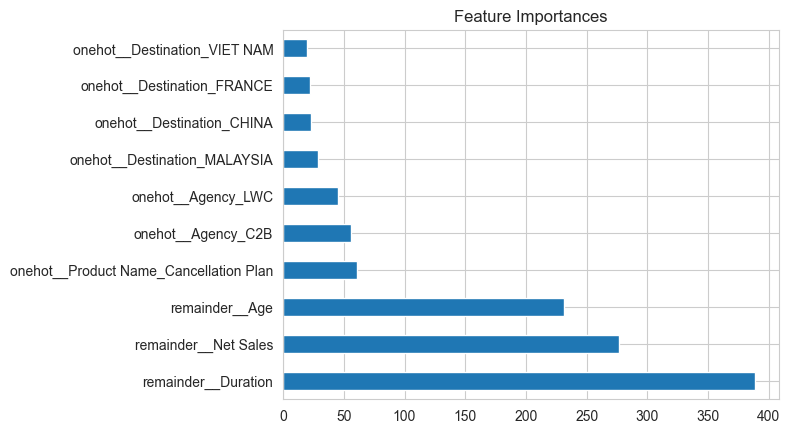

In [1537]:
coef1 = pd.Series(best_model['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head(10)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

Dari figure diatas, saya melihat bahwa kolom Duration adalah faktor yang paling penting seorang pemegang polis berpotensi/ tidaknya melakukan klaim. Kemudian diikuti dengan Net Sales, Age, dan seterusnya.



## Conclusion & Recommendation

In [1538]:
print('Classification Report Tuned LGBM : \n', report_tuned)


Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.99      0.81      0.89      3722
           1       0.06      0.62      0.10        68

    accuracy                           0.81      3790
   macro avg       0.52      0.71      0.50      3790
weighted avg       0.97      0.81      0.88      3790



#### Conclusion

Berdasarkan hasil classification report dari model diatas, maka dapat disimpulkan:
1. Recall       : Model dapat menyisihkan sebanyak 83% dari total pemegang polis sebagai pemegang polis yang tidak berpotensi melakukan klaim
2. Precision    : Model dapat menentukan sebanyak 99% dari total pemegang polis yang diduga tidak akan melakukan claim sebagai pemegang polis yang benar benar tidak akan melakukan klaim secara tepat.

Tujuan perusahaan yang dimana ingin mengetahui, pemegang polis yang seperti apa yang akan mengajukan klaim asuransi untuk pertanggungan dapat tercapai dengan melihat hasil model yang dimana calon pemegang polis tidak terdeteksi oleh model sebagai pemegang polis tidak klaim, maka calon pemegang polis tersebut termasuk berpotensi klaim.

#### Recommendation

Hal-hal yang bisa dilakukan untuk mengembangkan project dan modelnya lebih baik lagi :
- Menambahkan fitur atau kolom baru yang kemungkinan bisa membantu membuat suatu prediksi yang lebih tepat, misalnya kolom alasan seorang pemegang polis melakukan klaim.
- Mencoba algorithm ML yang lain dan juga mencoba hyperparameter tuning kembali, coba gunakan teknik oversampling yang berbeda juga selain Random Over Sampling, seperti SMOTENC, dll sehingga dapat lebih fokus ke pemegang polis yang berpotensi klaim. 
- Menganalisa lebih dalam untuk data-data yang model masih salah tebak untuk mengetahui alasan yang lebih pasti dan ciri/karateristiknya bagaimana.

In [1539]:
import pickle
filename = 'Travel_Insurance_Claim_Predict_Finalized_model.sav'
pickle.dump(best_model, open(filename, 'wb'))